<a href="https://colab.research.google.com/github/sebinsaji007/Machine_learning_journey/blob/main/PCA_tutorial_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd

dataset = load_digits()
dataset.keys()

In [ ]:
dataset.data.shape

In [ ]:
dataset.data[0]

In [ ]:
dataset.data[0].reshape(8,8)

<Figure size 640x480 with 0 Axes>

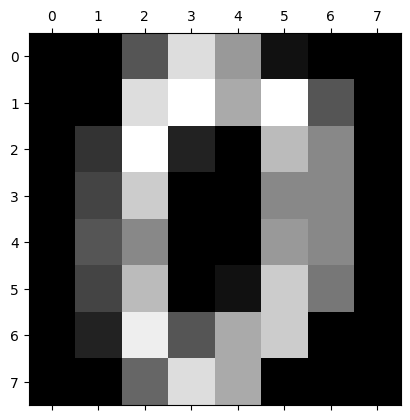

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

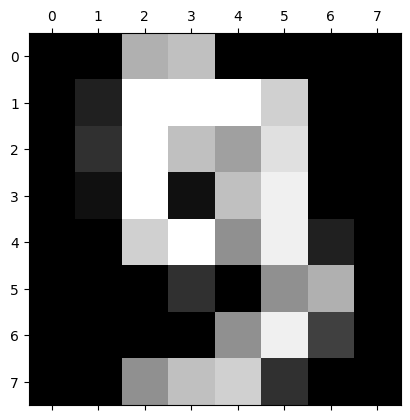

In [6]:
plt.matshow(dataset.data[9].reshape(8,8))

In [ ]:
dataset.target[:5]

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

In [ ]:
dataset.target

In [ ]:
df.describe()

In [11]:
X = df
y = dataset.target

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.n_components_

In [ ]:
X_pca

In [18]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

**Let's now select only two components**

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [21]:
X_pca

array([[ -1.25946722,  21.27488446],
       [  7.95761276, -20.76870311],
       [  6.99192351,  -9.95598479],
       ...,
       [ 10.80128138,  -6.96025001],
       [ -4.87209491,  12.42395192],
       [ -0.34439275,   6.36555391]])

In [22]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

**You can see that both combined retains 0.14+0.13=0.27 or 27% of important feature information**

In [26]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

We get less accuancy (~60%) as using only 2 components did not retain much of the feature information. However in real life you will find many cases where using 2 or few PCA components can still give you a pretty good accuracy